### Flow of this Notebook
0. Install required libraries
1. Look at the pymoo example and think about the necessary elements
2. Create the code to generate derivatives
3. Build a model to predict physical properties
4. Molecular optimization by genetic algorithm (NSGA-II)

In [ ]:
!pip install rdkit pymoo deepchem mordred==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176720 sha256=a37c7cf57c89d39350acc7097c527b80fae2554a6331713c07a413de2156bfed
  Stored in directory: /root/.cache/pi

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem, algorithm, ("n_gen", 200), seed=1, verbose=True)

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv     
     1 |      100 |     18 |  1.9687500927 |  2.6048048316 |  0.000000E+00
     2 |      200 |     22 |  1.9687500927 |  2.6551717460 |  0.000000E+00
     3 |      300 |     16 |  1.9156076841 |  2.6054011843 |  0.000000E+00
     4 |      400 |     27 |  1.9156076841 |  2.5981861153 |  0.000000E+00
     5 |      500 |     15 |  1.7845109513 |  2.5097347961 |  0.000000E+00
     6 |      600 |     15 |  1.5665669246 |  1.9741836262 |  0.000000E+00
     7 |      700 |     18 |  1.4888433157 |  1.9581850627 |  0.000000E+00
     8 |      800 |     19 |  1.4536833012 |  1.7639127072 |  0.000000E+00
     9 |      900 |     15 |  1.3258230370 |  1.8118192650 |  0.000000E+00
    10 |     1000 |     20 |  1.1683545980 |  1.7447809684 |  0.000000E+00
    11 |     1100 |     20 |  1.1599754009 |  1.5998448965 |  0.000000E+00
    12 |     1200 |     12 |  0.9825140783 |  1.6973675570 |  0.000000E+00
    13 |     1300 |     1

```python
class MyProblem(Problem):

    def __init__(self):

        # TO DO: setting up problem properly
        # n_var: number of substituable site in molecule
        # n_obj: number of properties to optimize, just 1 in this notebook
        # xl, xu: lower limit (xl) and upper limit (xu) of genome value, corresponds to number of substituents
        super().__init__(n_var=6, n_obj=1, xl=0, xu=4)

        # And, shoud bee able to accept the core structure and substituent candidates as arguments.
        # like...
        # problem = MyProblem(
        #     core='c1ccccc1',
        #     substituents= ["H*", "C*", "O*", "Cl*", "Br*", "OC*", "CCO*", "NC*"]
        # )

    def _evaluate(self, x, out, *args, **kwargs):

        # 1.generate genomes
        # x = np.round(x).astype(int).tolist()

        # 2. generate smiles by generated genomes
        # smiles_list = generate_structures()
        # 3.: estimate property
        # logS = estimate_logS(smiles_list)

        out["F"] = logS

problem = MyProblem(
)

algorithm = NSGA2(
    pop_size=100,
    n_offsprings=100,
    eliminate_duplicates=True,
)

res = minimize(
    problem,
    algorithm,
    ('n_gen', 10),
    seed=1,
    verbose=True
)
```


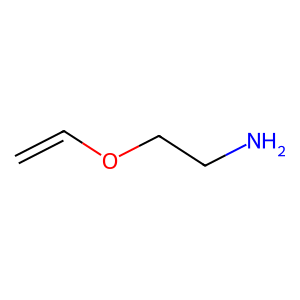

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

smi = "C=COCCN"
mol = Chem.MolFromSmiles(smi)
Draw.MolToImage(mol)

In [ ]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdchem


def draw_mol_with_indices(mol: rdchem.Mol) -> SVG:
    view = rdMolDraw2D.MolDraw2DSVG(200, 200)
    option = view.drawOptions()
    option.circleAtoms = False
    option.continuousHighlight = False
    option.addAtomIndices = True

    # rdDepictor.Compute2DCoords(mol)
    # Draw.SetACS1996Mode(option, Draw.MeanBondLength(mol))

    view.DrawMolecule(mol)
    view.FinishDrawing()
    svg = view.GetDrawingText()
    return SVG(svg)

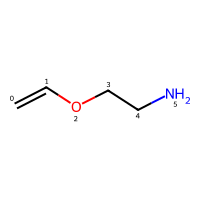

In [ ]:
smi = "C=COCCN"
mol = Chem.MolFromSmiles(smi)
draw_mol_with_indices(mol)

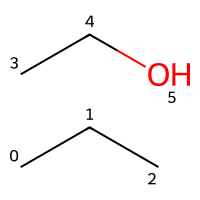

In [ ]:
mol1 = Chem.MolFromSmiles("CCC")
mol2 = Chem.MolFromSmiles("CCO")
comb_mols = Chem.CombineMols(mol1, mol2)
draw_mol_with_indices(comb_mols)

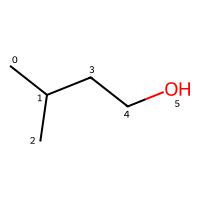

In [ ]:
rwmol = Chem.RWMol(comb_mols)
rwmol.AddBond(1, 3, Chem.BondType.SINGLE)
mol = Chem.Mol(rwmol)
Chem.SanitizeMol(mol)

draw_mol_with_indices(mol)

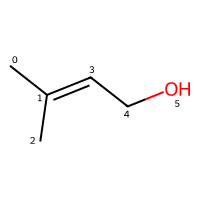

In [ ]:
rwmol = Chem.RWMol(comb_mols)
rwmol.AddBond(1, 3, Chem.BondType.DOUBLE)
mol = Chem.Mol(rwmol)
Chem.SanitizeMol(mol)

draw_mol_with_indices(mol)

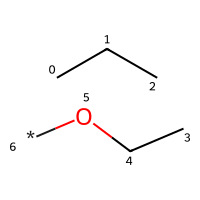

In [ ]:
mol1 = Chem.MolFromSmiles("CCC")
mol2 = Chem.MolFromSmiles("CCO*")
comb_mols = Chem.CombineMols(mol1, mol2)
draw_mol_with_indices(comb_mols)

1. Describe substituent with `*` symbol
2. Get the index of the atom bonded to `*` as index $j$
3. Delete the atom with `*` symbol
4. Create a bond between the atom with index $i$ and the atom with $j$ in the specified atom of the atoms constituting the main frame
5. Sanitize the molecule

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from typing import Dict


def generate_derivative(core: str, substitutes: Dict[int, str]) -> rdchem.Mol:

    mol = Chem.MolFromSmiles(core)

    for bond_i, sub_smi in substitutes.items():
        if sub_smi == "H*":
            pass
        else:
            sub = Chem.MolFromSmiles(sub_smi)
            mol = Chem.CombineMols(mol, sub)
            rwmol = Chem.RWMol(mol)
            for atom in mol.GetAtoms():
                if atom.GetSymbol() == "*":
                    neighbors = atom.GetNeighbors()
                    assert len(neighbors) == 1
                    bond_j = atom.GetNeighbors()[0].GetIdx()
                    rwmol.RemoveAtom(atom.GetIdx())
            rwmol.AddBond(bond_i, bond_j, Chem.BondType.SINGLE)
            mol = Chem.Mol(rwmol)
            Chem.SanitizeMol(mol)

    return mol

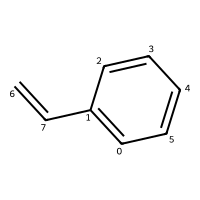

In [ ]:
mol = generate_derivative(core="c1ccccc1", substitutes={1: "C=C*"})

draw_mol_with_indices(mol)

{0: 'C*', 1: 'Br*', 2: 'H*', 3: 'O*', 4: 'H*', 5: 'Cl*'}


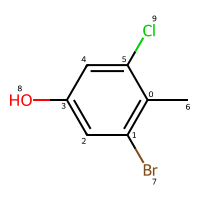

In [ ]:
import random

core = "c1ccccc1"
natoms_core = Chem.MolFromSmiles(core).GetNumAtoms()
substituents = ["H*", "C*", "O*", "Cl*", "Br*"]
genome = [random.randint(0, len(substituents) - 1) for i in range(natoms_core)]
substitutes = {i: substituents[k] for i, k in enumerate(genome)}

mol = generate_derivative(core, substitutes)
print(substitutes)
draw_mol_with_indices(mol)

In [ ]:
!git clone https://github.com/hodakamori/ml-tutorial.git

Cloning into 'ml-tutorial'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 108 (delta 32), reused 89 (delta 16), pack-reused 0
Receiving objects: 100% (108/108), 13.14 MiB | 18.11 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv("/content/ml-tutorial/data/delaney-mordred.csv")
df = df.dropna()
X = df.loc[:, df.columns.str.startswith("mordred_")]
y = df["logS"]
sc = StandardScaler()
X_std = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y)

model = Lasso(alpha=0.2)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2(train): {r2_train:.2f}, R2(test): {r2_test:.2f}")
print(f"MAE(train): {mae_train:.2f}, MAE(test): {mae_test:.2f}")

R2(train): 0.84, R2(test): 0.85
MAE(train): 0.62, MAE(test): 0.62


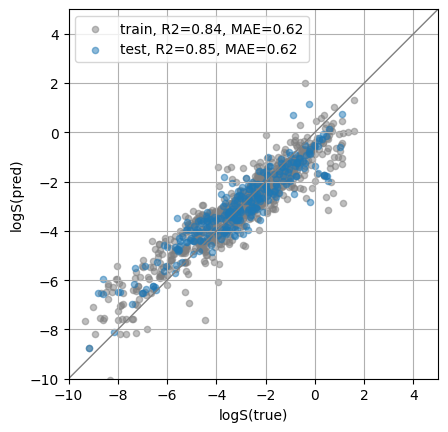

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(
    y_train,
    y_train_pred,
    s=20,
    alpha=0.5,
    label=f"train, R2={round(r2_train,2)}, MAE={round(mae_train,2)}",
    color="tab:gray",
)
ax.scatter(
    y_test,
    y_test_pred,
    s=20,
    alpha=0.5,
    label=f"test, R2={round(r2_test,2)}, MAE={round(mae_test,2)}",
    color="tab:blue",
)
ax.plot([-10, 5], [-10, 5], linewidth=1, color="tab:gray")
ax.set_xlabel("logS(true)")
ax.set_ylabel("logS(pred)")
ax.set_xlim(y.min(), y.max())
ax.set_ylim(y.min(), y.max())
ax.set_aspect("equal")
ax.set_xlim(-10, 5)
ax.set_ylim(-10, 5)
ax.legend()
ax.grid()

In [ ]:
import pickle

with open("lasso.pickle", "wb") as fo:
    pickle.dump({"model": model, "preprocess": sc}, fo)

In [ ]:
with open("lasso.pickle", "rb") as fi:
    tmp = pickle.load(fi)
    model = tmp["model"]
    sc = tmp["preprocess"]

model, sc

(Lasso(alpha=0.2), StandardScaler())

In [ ]:
import deepchem as dc

featurizer = dc.feat.MordredDescriptors(ignore_3D=True)
mordred_feat = featurizer.featurize(["C", "CCO", "CCNC", "CO"])
X_val = sc.transform(mordred_feat)
y_val = model.predict(X_val)
y_val

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 0.6994959 ,  0.74309289, -0.01993656,  1.32612084])

In [ ]:
from typing import List
import numpy as np


def estimate_logS(smiles_list: List[str]) -> np.ndarray:

    featurizer = dc.feat.MordredDescriptors(ignore_3D=True)
    mordred_feat = featurizer.featurize(smiles_list)
    X = sc.transform(mordred_feat)
    logS = model.predict(X)

    return logS

In [ ]:
from pymoo.core.problem import Problem


class LogSolubilityMoleculeOptimization(Problem):

    def __init__(self, core: str, substituents: List[str]):

        n_var = Chem.MolFromSmiles(core).GetNumAtoms()
        xu = len(substituents) - 1
        super().__init__(n_var=n_var, n_obj=1, xl=0, xu=xu)
        self.core = core
        self.substituents = substituents
        self.genomes = []
        self.props = []

    def _evaluate(self, x, out, *args, **kwargs):
        x = np.round(x).astype(int).tolist()
        self.genomes.append(x)
        substitution = [
            {i: self.substituents[k] for i, k in enumerate(idx)} for idx in x
        ]
        mols = [generate_derivative(self.core, sub) for sub in substitution]
        smiles_list = [Chem.MolToSmiles(mol) for mol in mols]
        logS = estimate_logS(smiles_list)
        self.props.append(logS)
        print(f"Min: {logS.min()}, Max: {logS.max()}")
        out["F"] = logS

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.problem import Problem

problem = LogSolubilityMoleculeOptimization(
    core="c1ccccc1", substituents=["H*", "C*", "O*", "Cl*", "Br*", "OC*", "CCO*", "NC*"]
)

algorithm = NSGA2(
    pop_size=100,
    n_offsprings=100,
    eliminate_duplicates=True,
)

res = minimize(problem, algorithm, ("n_gen", 10), seed=1, verbose=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -5.314763960670618, Max: -1.8024843570335183
n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -5.400463700492762, Max: -2.3801846205890484
     2 |      200 |      1 |  0.0856997398 |         ideal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -5.844745045533792, Max: -2.5262245023882834
     3 |      300 |      1 |  0.4442813450 |         ideal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -6.190696499522831, Max: -3.233565635697923
     4 |      400 |      1 |  0.3459514540 |         ideal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -6.6005560190192725, Max: -3.6627505499766864
     5 |      500 |      1 |  0.4098595195 |         ideal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -6.388931841719345, Max: -3.7870658691307226
     6 |      600 |      1 |  0.000000E+00 |             f


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -6.514502909586947, Max: -3.7619370730265924
     7 |      700 |      1 |  0.000000E+00 |             f


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -6.634256563276242, Max: -3.466776246138706
     8 |      800 |      1 |  0.0337005443 |         ideal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Min: -6.634256563276242, Max: -3.798240206009182
     9 |      900 |      2 |  0.000000E+00 |             f
Min: -6.634256563276242, Max: -4.392223320725372
    10 |     1000 |      3 |  0.000000E+00 |             f


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


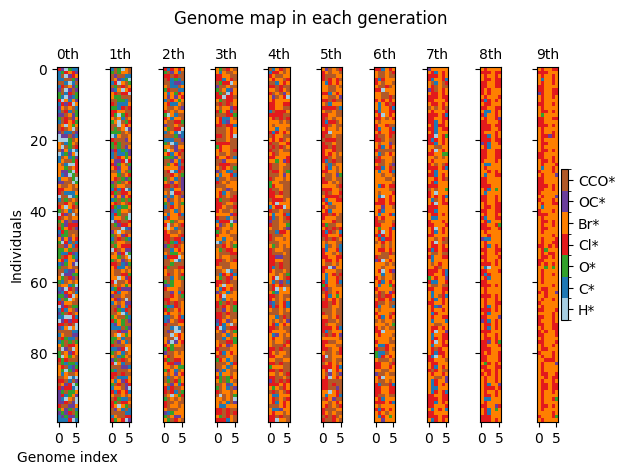

In [ ]:
import matplotlib as mpl

n_substituetns = len(problem.substituents)
cmap = mpl.cm.Paired
bounds = [i for i in range(n_substituetns)]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure()

for i, genomes in enumerate(problem.genomes):
    ax = fig.add_subplot(1, len(problem.genomes), i + 1)
    img = ax.imshow(genomes, cmap=cmap, norm=norm)
    ax.set_ylabel("Individuals")
    if i == 0:
        ax.set_xlabel("Genome index")
    ax.set_title(f"{i}th", fontsize=10)
    ax.label_outer()

cbar = fig.colorbar(
    img, ticks=np.linspace(0.5, n_substituetns - 0.5, n_substituetns), boundaries=bounds
)
cbar.ax.set_yticklabels(problem.substituents)
fig.suptitle("Genome map in each generation")
plt.tight_layout()

In [ ]:
problem.substituents

['H*', 'C*', 'O*', 'Cl*', 'Br*', 'OC*', 'CCO*', 'NC*']

In [ ]:
problem.genomes[0][0]

[3, 5, 0, 2, 1, 1]

In [ ]:
problem.props[1]

array([-3.72929488, -4.18285626, -3.44828238, -3.02772865, -3.51657604,
       -4.64442104, -3.45800667, -4.23386928, -2.76655008, -3.03293707,
       -3.75460486, -3.59775243, -5.31476396, -3.29742699, -4.46383196,
       -3.363197  , -4.68777199, -3.41688582, -2.76363426, -3.74129448,
       -3.98425605, -3.93162389, -2.72138945, -2.63290855, -2.44246253,
       -4.26162523, -3.38202799, -3.32369262, -4.31045209, -4.39300601,
       -4.02315207, -3.32443251, -3.95340055, -4.13677528, -4.46166253,
       -4.50008575, -4.30950427, -3.04688287, -5.32371291, -3.0679463 ,
       -3.77116634, -3.6453987 , -2.93925714, -3.25543052, -3.90247249,
       -3.12221716, -3.52026273, -4.0378041 , -3.26054028, -4.13864554,
       -3.75751965, -2.9064503 , -3.28826301, -3.45205802, -4.12354059,
       -3.53809149, -4.35056439, -4.30074468, -4.59278911, -3.91972499,
       -4.56530728, -3.62189762, -2.38018462, -4.76225871, -4.69542885,
       -3.30762791, -3.83138327, -4.3108585 , -4.2240846 , -4.46

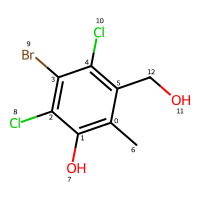

In [ ]:
substitutes = {i: problem.substituents[k] for i, k in enumerate(problem.genomes[0][1])}
mol = generate_derivative(core, substitutes)
draw_mol_with_indices(mol)

In [ ]:
def get_mols_in_specific_generation(
    generation: int, problem: Problem
) -> List[rdchem.Mol]:

    mols = []
    genoms = problem.genomes[generation]
    for genom in genoms:
        substitutes = {i: problem.substituents[k] for i, k in enumerate(genom)}
        mols.append(generate_derivative(core, substitutes))

    return mols

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


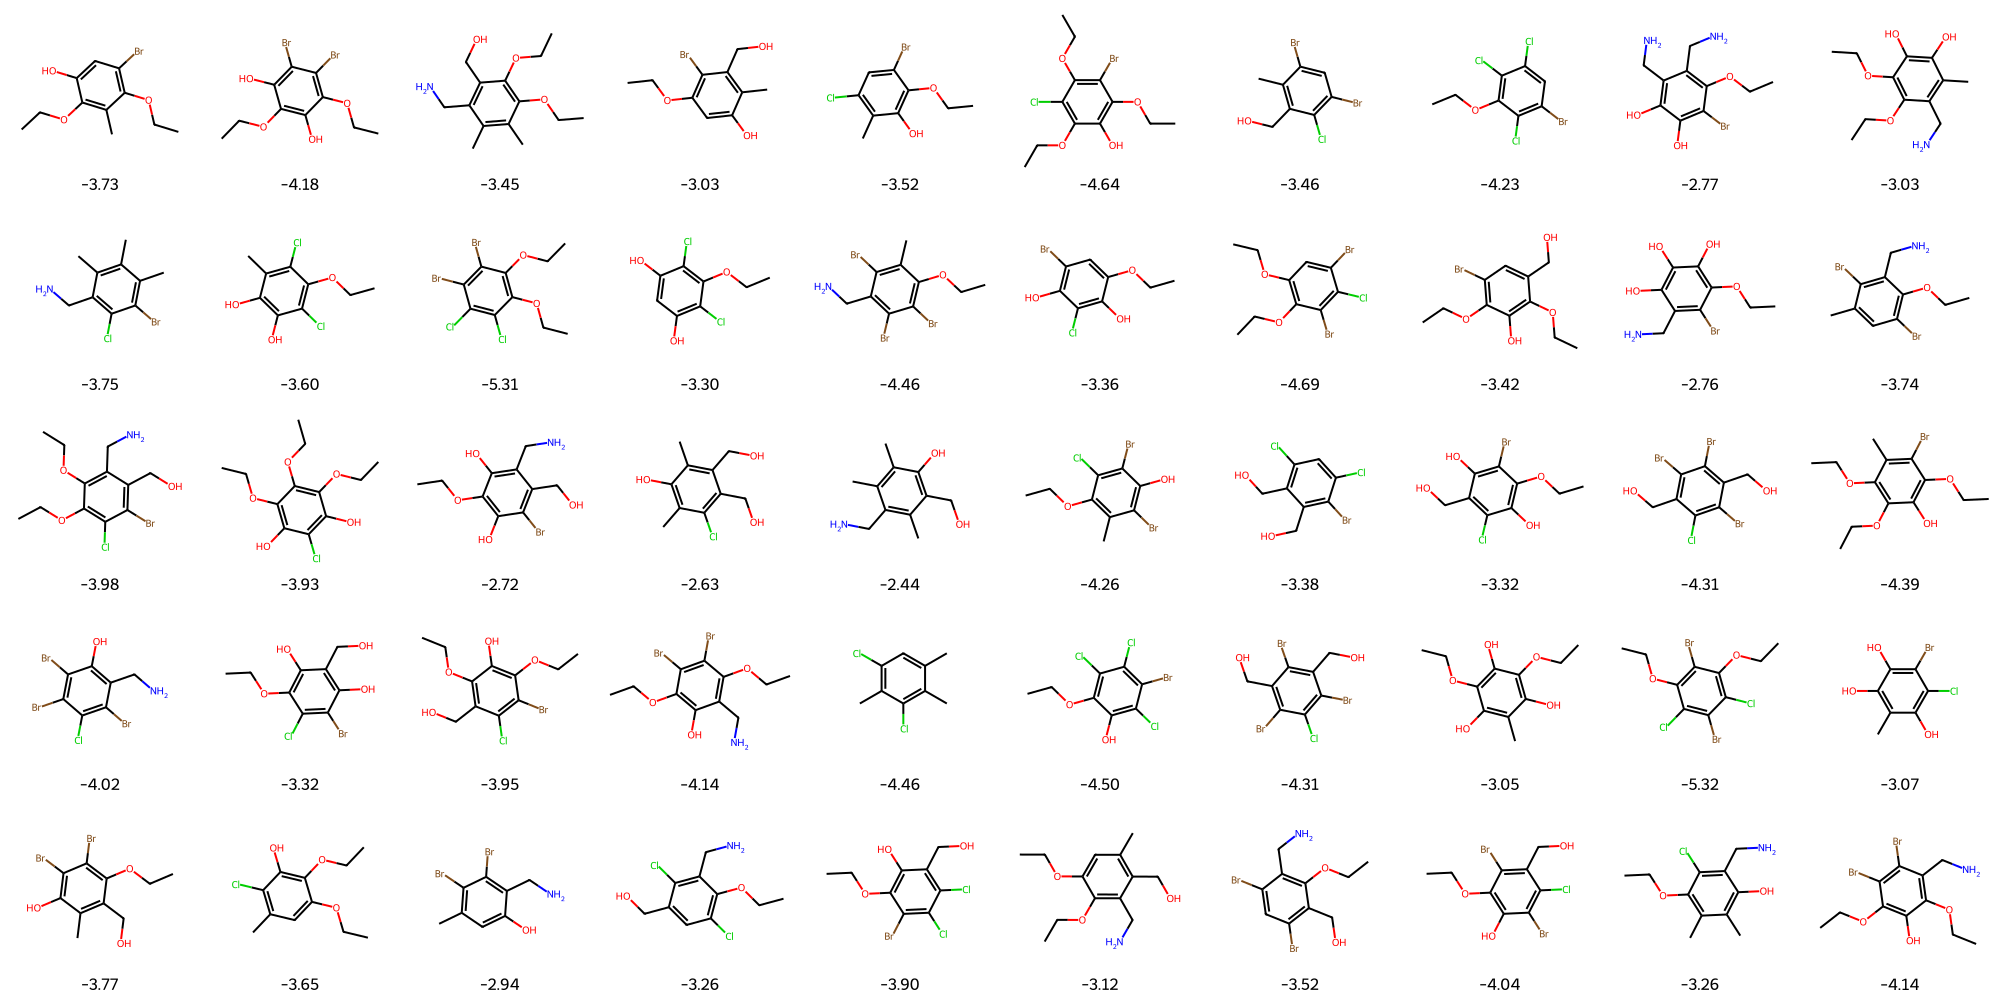

In [ ]:
generation = 1
mols = get_mols_in_specific_generation(generation=generation, problem=problem)
Draw.MolsToGridImage(
    mols, molsPerRow=10, legends=[f"{p:.2f}" for p in problem.props[generation]]
)

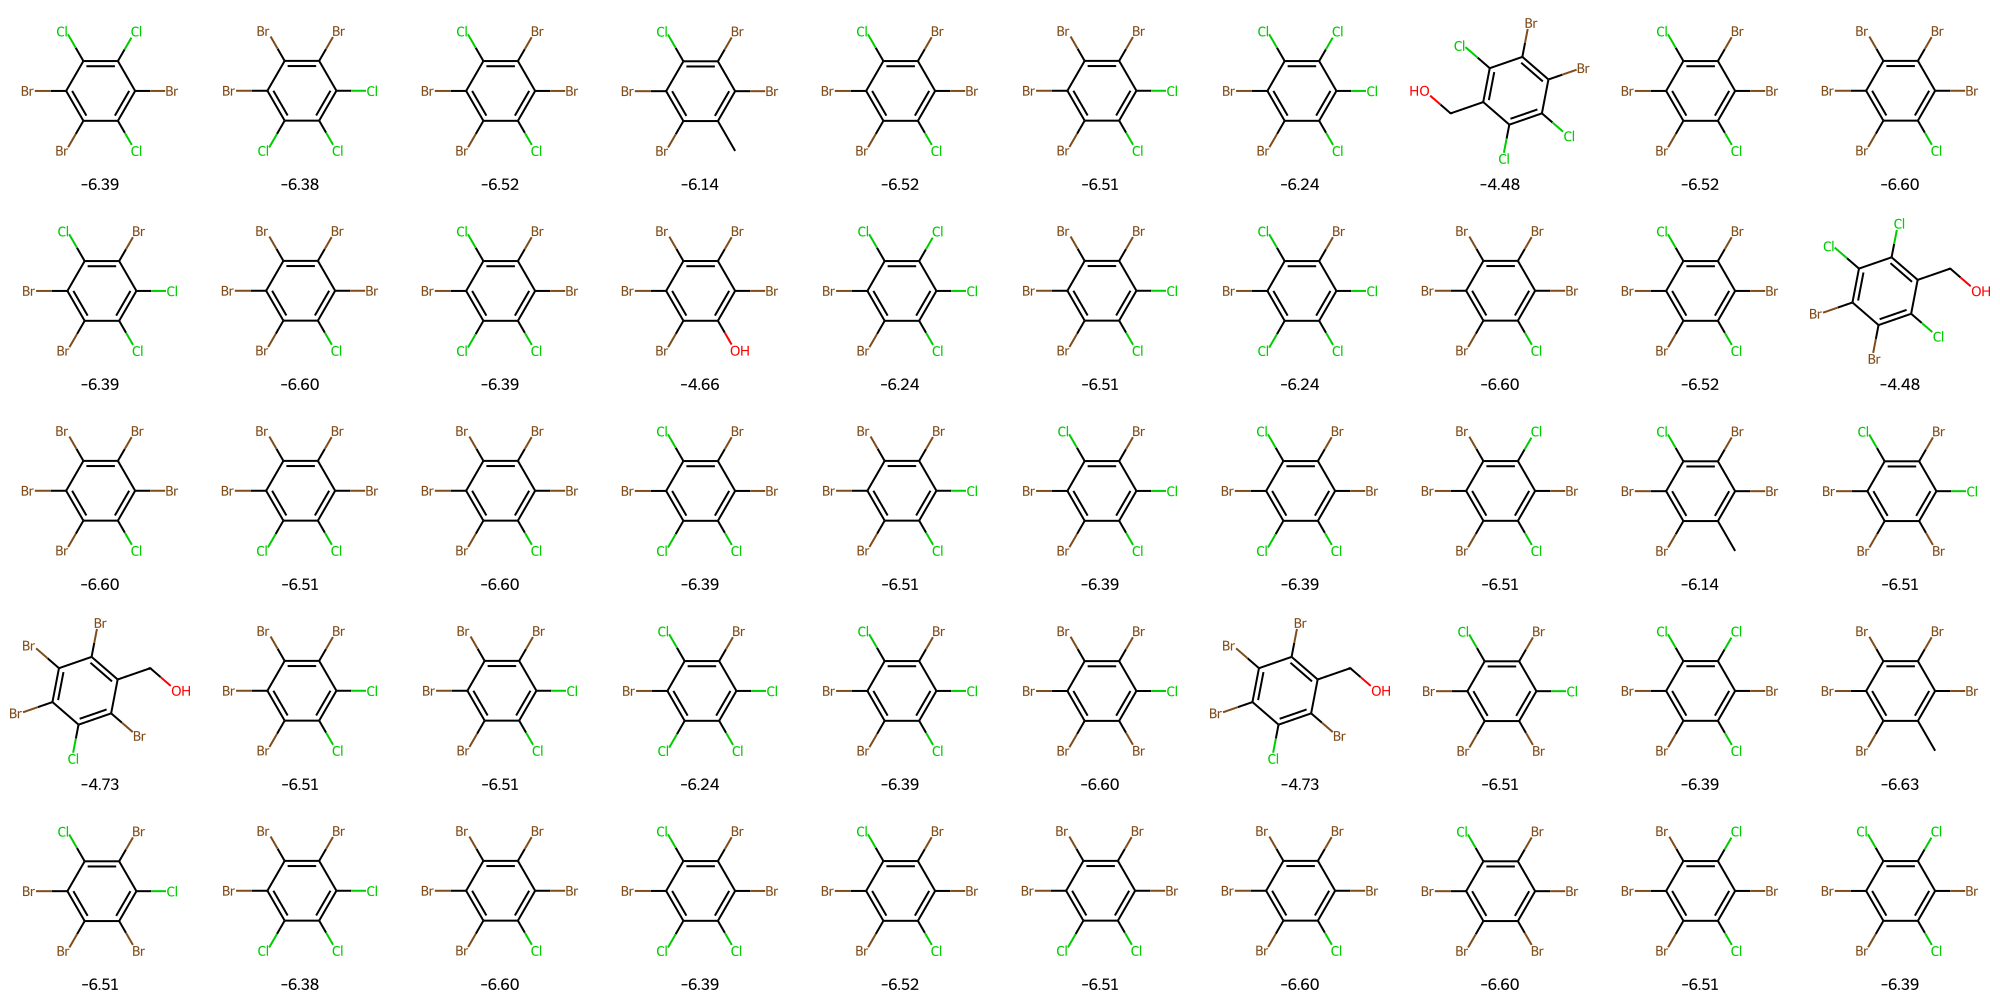

In [ ]:
generation = 9
mols = get_mols_in_specific_generation(generation=generation, problem=problem)
Draw.MolsToGridImage(
    mols, molsPerRow=10, legends=[f"{p:.2f}" for p in problem.props[generation]]
)

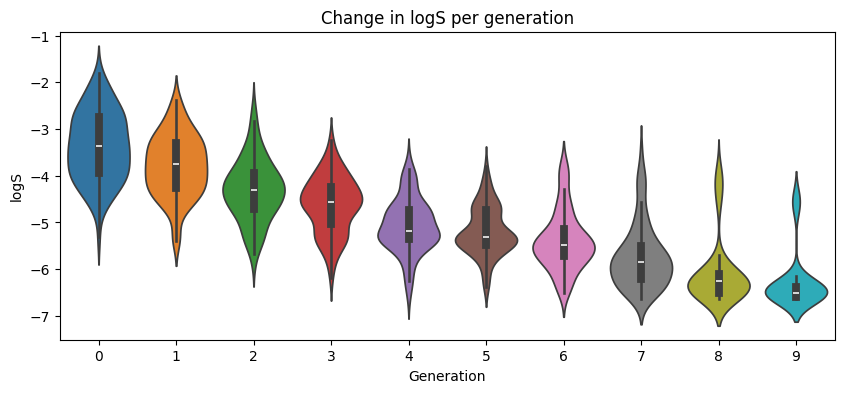

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.violinplot(data=problem.props)

plt.xlabel("Generation")
plt.ylabel("logS")
plt.title("Change in logS per generation")

plt.show()